<a href="https://colab.research.google.com/github/EricPettersonL/Telecom_X_pt1/blob/main/Telecom_X_pt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Inicio do Projeto

## Instalando as bibliotecas

In [109]:
# ​​ Instale bibliotecas se necessário
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Extração e analise inicial dos dados

In [110]:
# ​​ Defina a URL raw do GitHub
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"

# ​​ Faça a requisição e carregue o JSON
response = requests.get(url)
if response.status_code == 200:
    dados_json = response.json()
    print("JSON carregado com sucesso!")
else:
    raise Exception(f"Falha ao baixar arquivo: status {response.status_code}")

# ​​ Converter para DataFrame
df = pd.json_normalize(dados_json)

# ​​ Visualização rápida
print("Dimensões do DataFrame:", df.shape)
display(df.head(5))


JSON carregado com sucesso!
Dimensões do DataFrame: (7267, 21)


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [111]:
#Salvando localmente
df.to_csv('TelecomX_Data.csv', index=False)

#### Dicionário de dados

* `customerID`: número de identificação único de cada cliente
* `Churn`: se o cliente deixou ou não a empresa
* `gender`: gênero (masculino e feminino)
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefônico
* `MultipleLines`: assisnatura de mais de uma linha de telefone
* `InternetService`: assinatura de um provedor internet
* `OnlineSecurity`: assinatura adicional de segurança online
* `OnlineBackup`: assinatura adicional de backup online
* `DeviceProtection`: assinatura adicional de proteção no dispositivo
* `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
* `StreamingTV`: assinatura de TV a cabo
* `StreamingMovies`: assinatura de streaming de filmes
* `Contract`: tipo de contrato
* `PaperlessBilling`: se o cliente prefere receber online a fatura
* `PaymentMethod`: forma de pagamento
* `Charges.Monthly`: total de todos os serviços do cliente por mês
* `Charges.Total`: total gasto pelo cliente

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

### Alterando os nomes das colunas

In [113]:
novas_colunas = {
    'customerID' : 'ID',
    'Churn' : 'evasao',
    'customer.gender' : 'sexo',
    'customer.SeniorCitizen' : 'idoso',
    'customer.Partner' : 'parceiro',
    'customer.Dependents' : 'dependentes',
    'customer.tenure' : 'meses_contrato',
    'phone.PhoneService' : 'assinatura_telefonica',
    'phone.MultipleLines' : 'mais_linhas',
    'internet.InternetService' : 'assinatura_internet',
   'internet.OnlineSecurity' : 'assinatura_seguranca_online',
   'internet.OnlineBackup' : 'assinatura_backup',
   'internet.DeviceProtection' : 'assinatura_protecao_dispositivo',
   'internet.TechSupport' : 'suporte_tecnico',
   'internet.StreamingTV' : 'assinatura_tv',
   'internet.StreamingMovies' : 'assinatura_streaming',
   'account.Contract' : 'tipo_contrato',
   'account.PaperlessBilling' : 'fatura_online',
   'account.PaymentMethod' : 'metodo_pagamento',
   'account.Charges.Monthly' : 'total_servico_mes',
   'account.Charges.Total' : 'total_gasto'
}

In [114]:
dados = df.rename(columns=novas_colunas)
dados.head()

,ID,evasao,sexo,idoso,parceiro,dependentes,meses_contrato,assinatura_telefonica,mais_linhas,assinatura_internet,...,assinatura_backup,assinatura_protecao_dispositivo,suporte_tecnico,assinatura_tv,assinatura_streaming,tipo_contrato,fatura_online,metodo_pagamento,total_servico_mes,total_gasto
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


### Tipos dos dados

In [115]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               7267 non-null   object 
 1   evasao                           7267 non-null   object 
 2   sexo                             7267 non-null   object 
 3   idoso                            7267 non-null   int64  
 4   parceiro                         7267 non-null   object 
 5   dependentes                      7267 non-null   object 
 6   meses_contrato                   7267 non-null   int64  
 7   assinatura_telefonica            7267 non-null   object 
 8   mais_linhas                      7267 non-null   object 
 9   assinatura_internet              7267 non-null   object 
 10  assinatura_seguranca_online      7267 non-null   object 
 11  assinatura_backup                7267 non-null   object 
 12  assinatura_protecao_

### Verificar valores ausentes

In [116]:
missing_values = dados.isnull().sum()
print(missing_values)

ID                                 0
evasao                             0
sexo                               0
idoso                              0
parceiro                           0
dependentes                        0
meses_contrato                     0
assinatura_telefonica              0
mais_linhas                        0
assinatura_internet                0
assinatura_seguranca_online        0
assinatura_backup                  0
assinatura_protecao_dispositivo    0
suporte_tecnico                    0
assinatura_tv                      0
assinatura_streaming               0
tipo_contrato                      0
fatura_online                      0
metodo_pagamento                   0
total_servico_mes                  0
total_gasto                        0
dtype: int64


### Verificar duplicados

In [117]:
duplicados = dados.duplicated().sum()
print(f"Total de linhas duplicadas: {duplicados}")

Total de linhas duplicadas: 0


### Analise de cada coluna


In [118]:
print(dados['evasao'].describe())
print(dados['evasao'].value_counts())

count     7267
unique       3
top         No
freq      5174
Name: evasao, dtype: object
evasao
No     5174
Yes    1869
        224
Name: count, dtype: int64


In [119]:
print(dados['sexo'].describe())
print(dados['sexo'].value_counts())

count     7267
unique       2
top       Male
freq      3675
Name: sexo, dtype: object
sexo
Male      3675
Female    3592
Name: count, dtype: int64


In [120]:
print(dados['idoso'].describe())
print(dados['idoso'].value_counts())

count    7267.000000
mean        0.162653
std         0.369074
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: idoso, dtype: float64
idoso
0    6085
1    1182
Name: count, dtype: int64


In [121]:
print(dados['parceiro'].describe())
print(dados['parceiro'].value_counts())

count     7267
unique       2
top         No
freq      3749
Name: parceiro, dtype: object
parceiro
No     3749
Yes    3518
Name: count, dtype: int64


In [122]:
print(dados['dependentes'].describe())
print(dados['dependentes'].value_counts())

count     7267
unique       2
top         No
freq      5086
Name: dependentes, dtype: object
dependentes
No     5086
Yes    2181
Name: count, dtype: int64


In [123]:
print(dados['meses_contrato'].describe())
print(dados['meses_contrato'].value_counts())

count    7267.000000
mean       32.346498
std        24.571773
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: meses_contrato, dtype: float64
meses_contrato
1     634
72    369
2     246
3     207
4     185
     ... 
28     60
39     59
44     54
36     50
0      11
Name: count, Length: 73, dtype: int64


In [124]:
print(dados['assinatura_telefonica'].describe())
print(dados['assinatura_telefonica'].value_counts())

count     7267
unique       2
top        Yes
freq      6560
Name: assinatura_telefonica, dtype: object
assinatura_telefonica
Yes    6560
No      707
Name: count, dtype: int64


In [125]:
print(dados['mais_linhas'].describe())
print(dados['mais_linhas'].value_counts())

count     7267
unique       3
top         No
freq      3495
Name: mais_linhas, dtype: object
mais_linhas
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64


In [126]:
print(dados['assinatura_internet'].describe())
print(dados['assinatura_internet'].value_counts())

count            7267
unique              3
top       Fiber optic
freq             3198
Name: assinatura_internet, dtype: object
assinatura_internet
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64


In [127]:
print(dados['assinatura_seguranca_online'].describe())
print(dados['assinatura_seguranca_online'].value_counts())

count     7267
unique       3
top         No
freq      3608
Name: assinatura_seguranca_online, dtype: object
assinatura_seguranca_online
No                     3608
Yes                    2078
No internet service    1581
Name: count, dtype: int64


In [128]:
print(dados['assinatura_backup'].describe())
print(dados['assinatura_backup'].value_counts())

count     7267
unique       3
top         No
freq      3182
Name: assinatura_backup, dtype: object
assinatura_backup
No                     3182
Yes                    2504
No internet service    1581
Name: count, dtype: int64


In [129]:
print(dados['assinatura_protecao_dispositivo'].describe())
print(dados['assinatura_protecao_dispositivo'].value_counts())

count     7267
unique       3
top         No
freq      3195
Name: assinatura_protecao_dispositivo, dtype: object
assinatura_protecao_dispositivo
No                     3195
Yes                    2491
No internet service    1581
Name: count, dtype: int64


In [130]:
print(dados['suporte_tecnico'].describe())
print(dados['suporte_tecnico'].value_counts())

count     7267
unique       3
top         No
freq      3582
Name: suporte_tecnico, dtype: object
suporte_tecnico
No                     3582
Yes                    2104
No internet service    1581
Name: count, dtype: int64


In [131]:
print(dados['assinatura_tv'].describe())
print(dados['assinatura_tv'].value_counts())

count     7267
unique       3
top         No
freq      2896
Name: assinatura_tv, dtype: object
assinatura_tv
No                     2896
Yes                    2790
No internet service    1581
Name: count, dtype: int64


In [132]:
print(dados['assinatura_streaming'].describe())
print(dados['assinatura_streaming'].value_counts())

count     7267
unique       3
top         No
freq      2870
Name: assinatura_streaming, dtype: object
assinatura_streaming
No                     2870
Yes                    2816
No internet service    1581
Name: count, dtype: int64


In [133]:
print(dados['tipo_contrato'].describe())
print(dados['tipo_contrato'].value_counts())

count               7267
unique                 3
top       Month-to-month
freq                4005
Name: tipo_contrato, dtype: object
tipo_contrato
Month-to-month    4005
Two year          1743
One year          1519
Name: count, dtype: int64


In [134]:
print(dados['fatura_online'].describe())
print(dados['fatura_online'].value_counts())

count     7267
unique       2
top        Yes
freq      4311
Name: fatura_online, dtype: object
fatura_online
Yes    4311
No     2956
Name: count, dtype: int64


In [135]:
print(dados['metodo_pagamento'].describe())
print(dados['metodo_pagamento'].value_counts())

count                 7267
unique                   4
top       Electronic check
freq                  2445
Name: metodo_pagamento, dtype: object
metodo_pagamento
Electronic check             2445
Mailed check                 1665
Bank transfer (automatic)    1589
Credit card (automatic)      1568
Name: count, dtype: int64


In [136]:
print(dados['total_servico_mes'].describe())
print(dados['total_servico_mes'].value_counts())

count    7267.000000
mean       64.720098
std        30.129572
min        18.250000
25%        35.425000
50%        70.300000
75%        89.875000
max       118.750000
Name: total_servico_mes, dtype: float64
total_servico_mes
20.05    65
19.90    46
19.85    46
19.55    45
19.70    45
         ..
87.90     1
87.60     1
52.20     1
68.30     1
66.60     1
Name: count, Length: 1585, dtype: int64


In [137]:
print(dados['total_gasto'].describe())
print(dados['total_gasto'].value_counts())

count     7267
unique    6531
top       20.2
freq        11
Name: total_gasto, dtype: object
total_gasto
20.2       11
           11
19.75       9
19.55       9
19.9        9
           ..
1993.2      1
72.1        1
1237.85     1
542.4       1
593.3       1
Name: count, Length: 6531, dtype: int64


In [138]:
dados[dados['total_gasto'] == ' ']

,ID,evasao,sexo,idoso,parceiro,dependentes,meses_contrato,assinatura_telefonica,mais_linhas,assinatura_internet,...,assinatura_backup,assinatura_protecao_dispositivo,suporte_tecnico,assinatura_tv,assinatura_streaming,tipo_contrato,fatura_online,metodo_pagamento,total_servico_mes,total_gasto
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


## Tratamento dos dados

### Tirando os dados vazios da coluna evasao

In [139]:
dados = dados[dados['evasao'].notnull()]
dados = dados[dados['evasao'] != '']


In [140]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               7043 non-null   object 
 1   evasao                           7043 non-null   object 
 2   sexo                             7043 non-null   object 
 3   idoso                            7043 non-null   int64  
 4   parceiro                         7043 non-null   object 
 5   dependentes                      7043 non-null   object 
 6   meses_contrato                   7043 non-null   int64  
 7   assinatura_telefonica            7043 non-null   object 
 8   mais_linhas                      7043 non-null   object 
 9   assinatura_internet              7043 non-null   object 
 10  assinatura_seguranca_online      7043 non-null   object 
 11  assinatura_backup                7043 non-null   object 
 12  assinatura_protecao_dispo

### Tratando a coluna total gasto

In [141]:
dados['total_gasto'] = dados['total_gasto'].str.replace(' ', '0')

In [142]:
(dados['total_gasto'] == ' ').sum()

np.int64(0)

In [143]:
dados['total_gasto'] = dados['total_gasto'].astype('float64')

In [144]:
dados['total_gasto'].describe()

,total_gasto
count,7043.000000
mean,2279.734304
std,2266.794470
min,0.000000
25%,398.550000
50%,1394.550000
75%,3786.600000
max,8684.800000


### Convertendo idoso para Yes ou No

In [145]:
dados['idoso'] = dados['idoso'].map({0: 'No', 1: 'Yes'})

### Convertando os Yes e No para 1 e 0

In [155]:
dados['evasao'] = dados['evasao'].map({'Yes': 1, 'No': 0})

In [156]:
dados.head(5)

,ID,evasao,sexo,idoso,parceiro,dependentes,meses_contrato,assinatura_telefonica,mais_linhas,assinatura_internet,...,assinatura_protecao_dispositivo,suporte_tecnico,assinatura_tv,assinatura_streaming,tipo_contrato,fatura_online,metodo_pagamento,total_servico_mes,total_gasto,contas_diarias
0,0002-ORFBO,0,Female,No,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,No,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


### Criar coluna Conta Diaria

In [147]:
dados['contas_diarias'] = (dados['total_servico_mes'] / 30).round(2)

In [148]:
dados.head(5)

,ID,evasao,sexo,idoso,parceiro,dependentes,meses_contrato,assinatura_telefonica,mais_linhas,assinatura_internet,...,assinatura_protecao_dispositivo,suporte_tecnico,assinatura_tv,assinatura_streaming,tipo_contrato,fatura_online,metodo_pagamento,total_servico_mes,total_gasto,contas_diarias
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


## Analise descritiva

In [149]:
dados.describe()

,meses_contrato,total_servico_mes,total_gasto,contas_diarias
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,2.158675
std,24.559481,30.090047,2266.794470,1.003088
min,0.000000,18.250000,0.000000,0.610000
25%,9.000000,35.500000,398.550000,1.180000
50%,29.000000,70.350000,1394.550000,2.340000
75%,55.000000,89.850000,3786.600000,2.990000
max,72.000000,118.750000,8684.800000,3.960000


In [150]:
# Mediana
mediana = dados.median(numeric_only=True)
print("Mediana:\n", mediana)

# Variância
variancia = dados.var(numeric_only=True)
print("\nVariância:\n", variancia)

# Coeficiente de variação
cv = (dados.std(numeric_only=True) / dados.mean(numeric_only=True))
print("\nCoeficiente de variação:\n", cv)


Mediana:
 meses_contrato         29.00
total_servico_mes      70.35
total_gasto          1394.55
contas_diarias          2.34
dtype: float64

Variância:
 meses_contrato       6.031681e+02
total_servico_mes    9.054109e+02
total_gasto          5.138357e+06
contas_diarias       1.006185e+00
dtype: float64

Coeficiente de variação:
 meses_contrato       0.758684
total_servico_mes    0.464627
total_gasto          0.994324
contas_diarias       0.464677
dtype: float64


In [151]:
# Contagem de cada categoria
for col in dados.select_dtypes(include='object').columns:
    print(f"\nColuna: {col}")
    print(dados[col].value_counts())



Coluna: ID
ID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
9970-QBCDA    1
9968-FFVVH    1
             ..
0014-BMAQU    1
0013-SMEOE    1
0013-MHZWF    1
0013-EXCHZ    1
0011-IGKFF    1
Name: count, Length: 7043, dtype: int64

Coluna: evasao
evasao
No     5174
Yes    1869
Name: count, dtype: int64

Coluna: sexo
sexo
Male      3555
Female    3488
Name: count, dtype: int64

Coluna: idoso
idoso
No     5901
Yes    1142
Name: count, dtype: int64

Coluna: parceiro
parceiro
No     3641
Yes    3402
Name: count, dtype: int64

Coluna: dependentes
dependentes
No     4933
Yes    2110
Name: count, dtype: int64

Coluna: assinatura_telefonica
assinatura_telefonica
Yes    6361
No      682
Name: count, dtype: int64

Coluna: mais_linhas
mais_linhas
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

Coluna: assinatura_internet
assinatura_internet
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Coluna: assinatur

### Distribuição da evasão

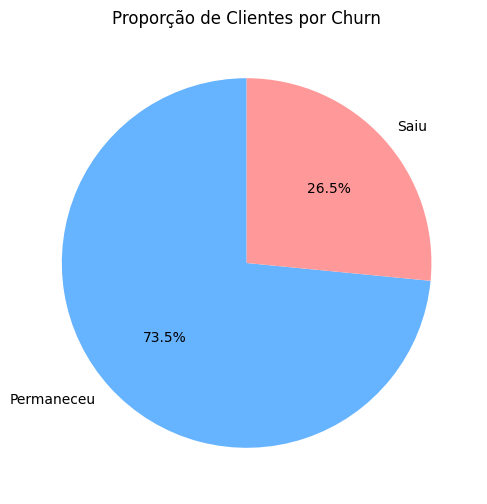

In [152]:
contagem_evasao = dados['evasao'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(contagem_evasao.values, labels=['Permaneceu', 'Saiu'],
        autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], startangle=90)
plt.title("Proporção de Clientes por Churn")
plt.show()


### Contagem de Evasão por Variáveis Categóricas

In [153]:
colunas_categoricas = ['sexo', 'idoso', 'parceiro', 'dependentes', 'assinatura_telefonica',
                       'mais_linhas', 'assinatura_seguranca_online', 'assinatura_backup',
                       'assinatura_protecao_dispositivo', 'suporte_tecnico', 'assinatura_tv',
                       'assinatura_streaming', 'tipo_contrato', 'fatura_online', 'metodo_pagamento']

In [157]:
for col in colunas_categoricas:
    prop = dados.groupby(col)['evasao'].mean().sort_values(ascending=False)
    print(f"\nProporção de evasão por {col}:\n{prop}")



Proporção de evasão por sexo:
sexo
Female    0.269209
Male      0.261603
Name: evasao, dtype: float64

Proporção de evasão por idoso:
idoso
Yes    0.416813
No     0.236062
Name: evasao, dtype: float64

Proporção de evasão por parceiro:
parceiro
No     0.329580
Yes    0.196649
Name: evasao, dtype: float64

Proporção de evasão por dependentes:
dependentes
No     0.312791
Yes    0.154502
Name: evasao, dtype: float64

Proporção de evasão por assinatura_telefonica:
assinatura_telefonica
Yes    0.267096
No     0.249267
Name: evasao, dtype: float64

Proporção de evasão por mais_linhas:
mais_linhas
Yes                 0.286099
No                  0.250442
No phone service    0.249267
Name: evasao, dtype: float64

Proporção de evasão por assinatura_seguranca_online:
assinatura_seguranca_online
No                     0.417667
Yes                    0.146112
No internet service    0.074050
Name: evasao, dtype: float64

Proporção de evasão por assinatura_backup:
assinatura_backup
No              

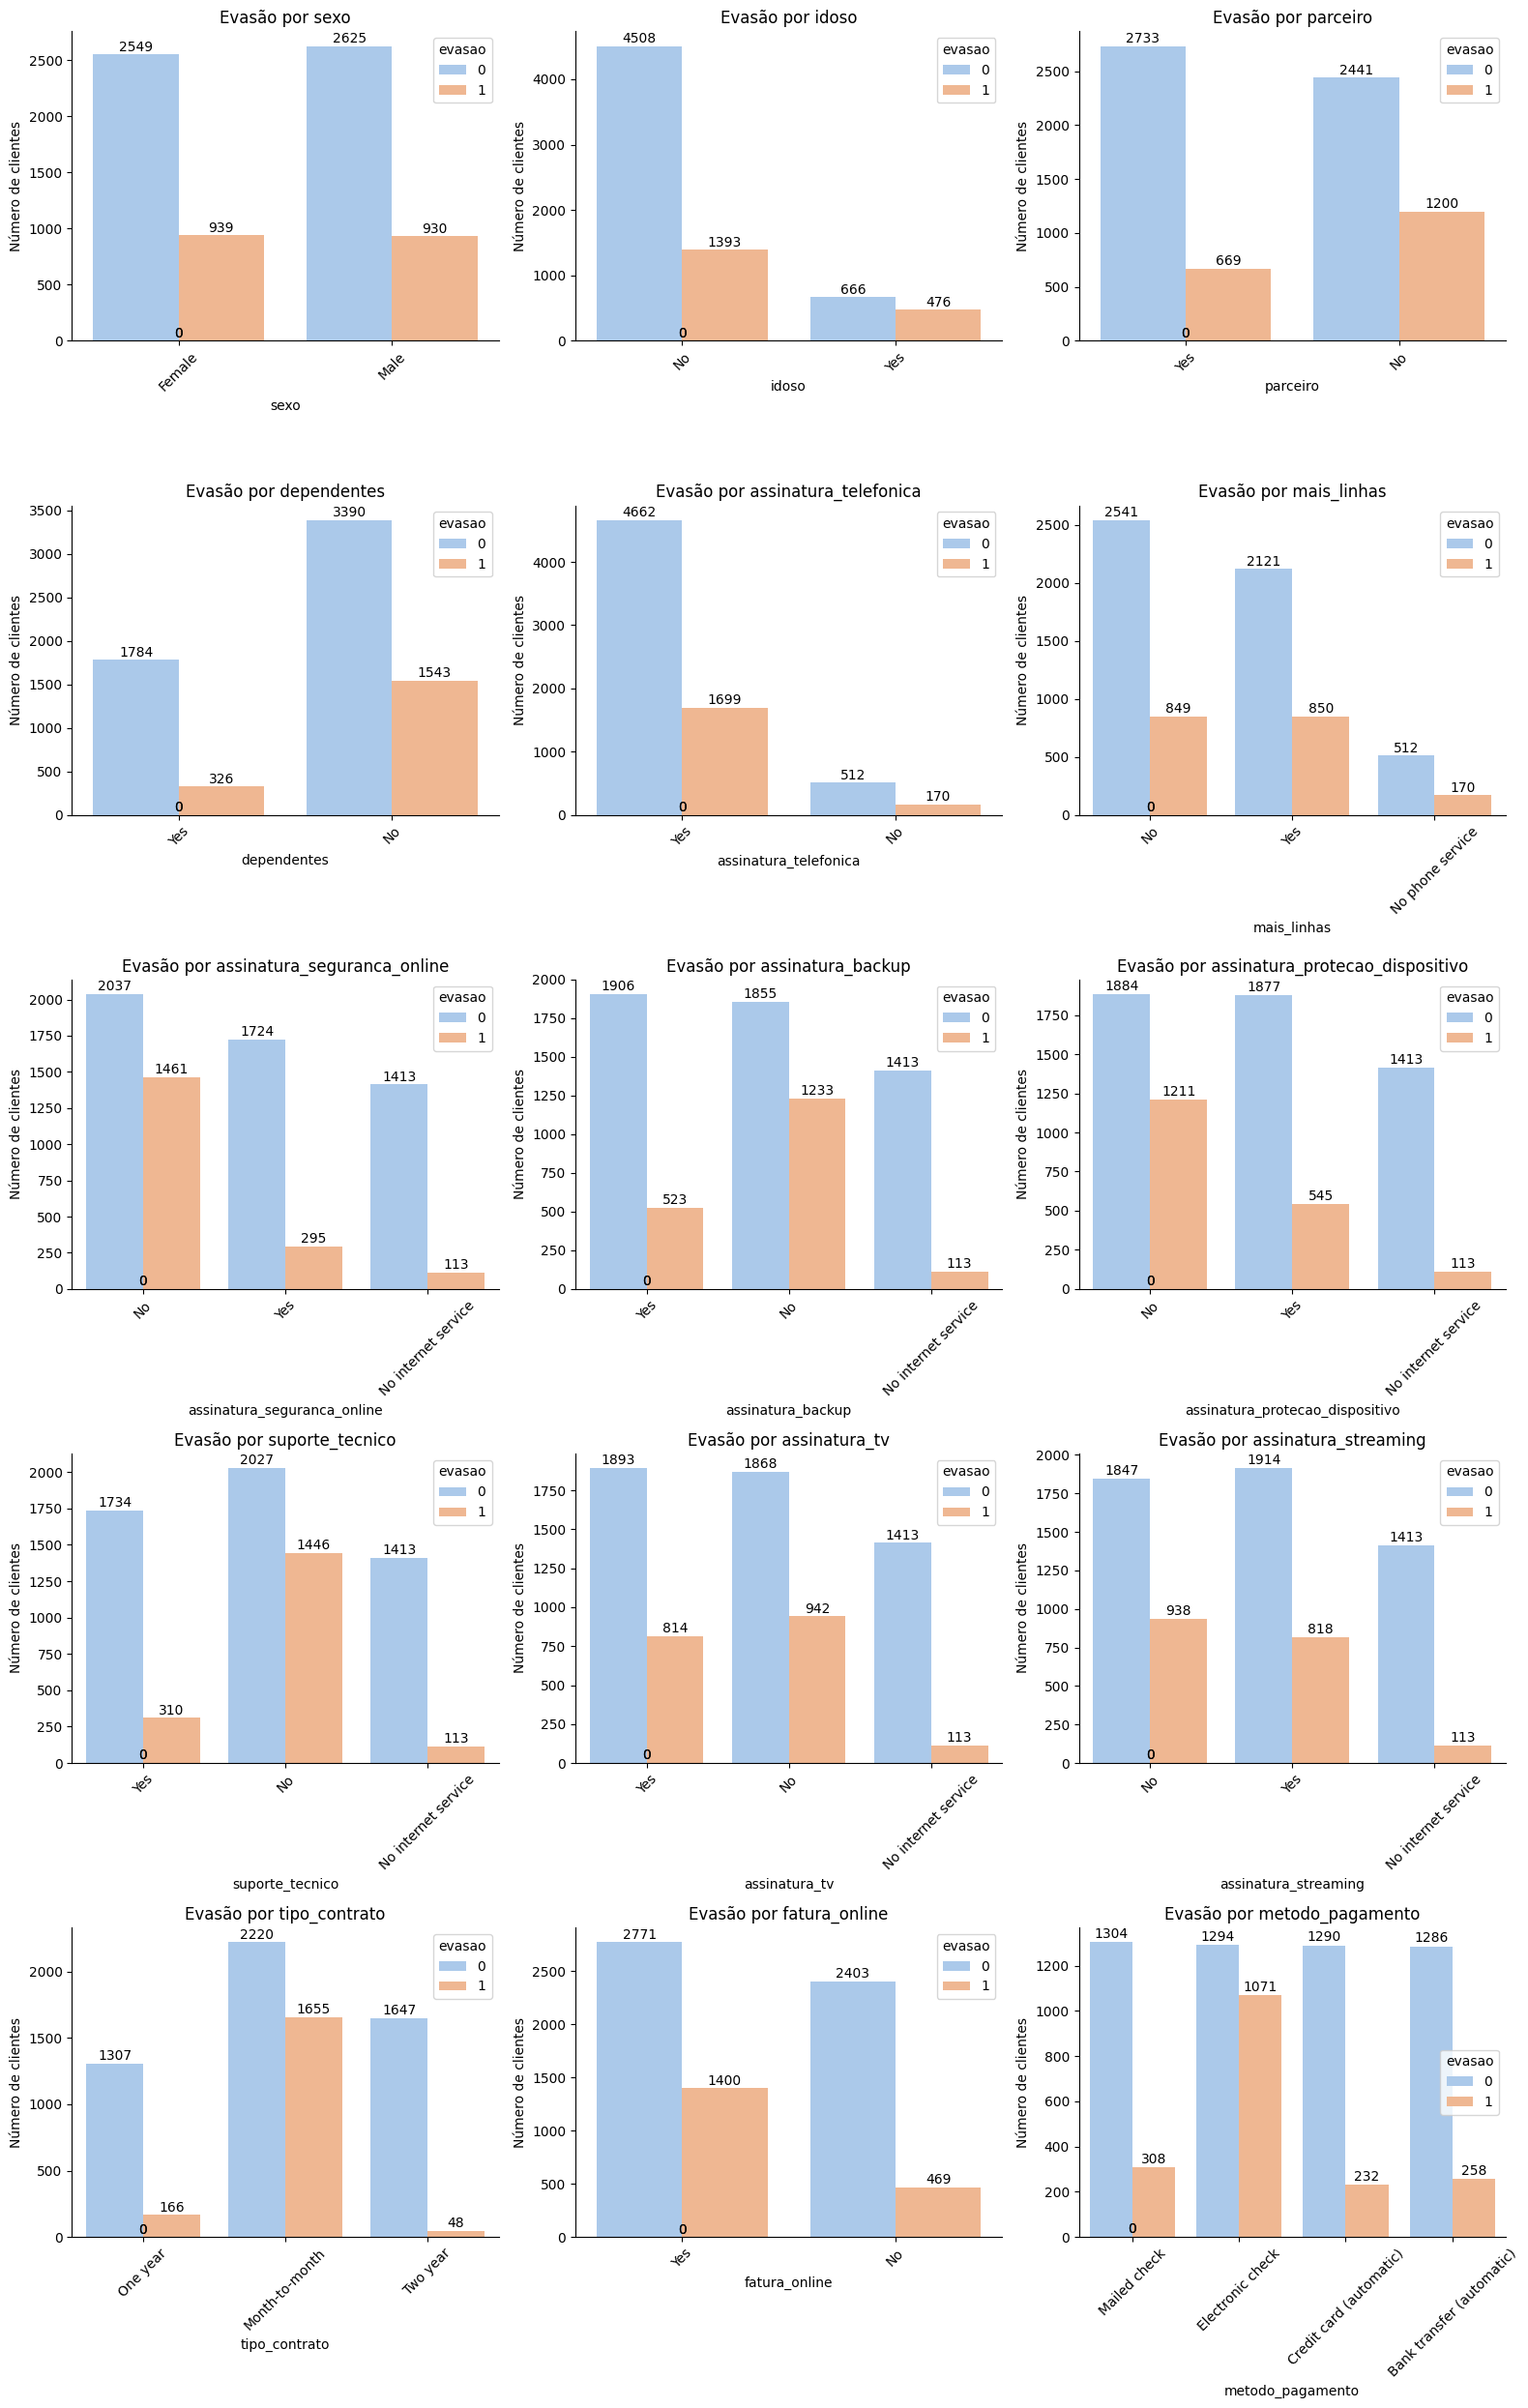

In [163]:
plt.figure(figsize=(16,25))

for i, col in enumerate(colunas_categoricas, 1):
    plt.subplot(5, 3, i)

    ax = sns.countplot(data=dados, x=col, hue='evasao', palette='pastel')

    # Adicionar valores no topo das barras
    for p in ax.patches:
        altura = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., altura + 5, int(altura),
                ha='center', va='bottom', fontsize=10)

    plt.title(f"Evasão por {col}")
    plt.xlabel(col)
    plt.ylabel("Número de clientes")
    plt.xticks(rotation=45)

    # Remover bordas
    sns.despine()

plt.tight_layout()
plt.show()


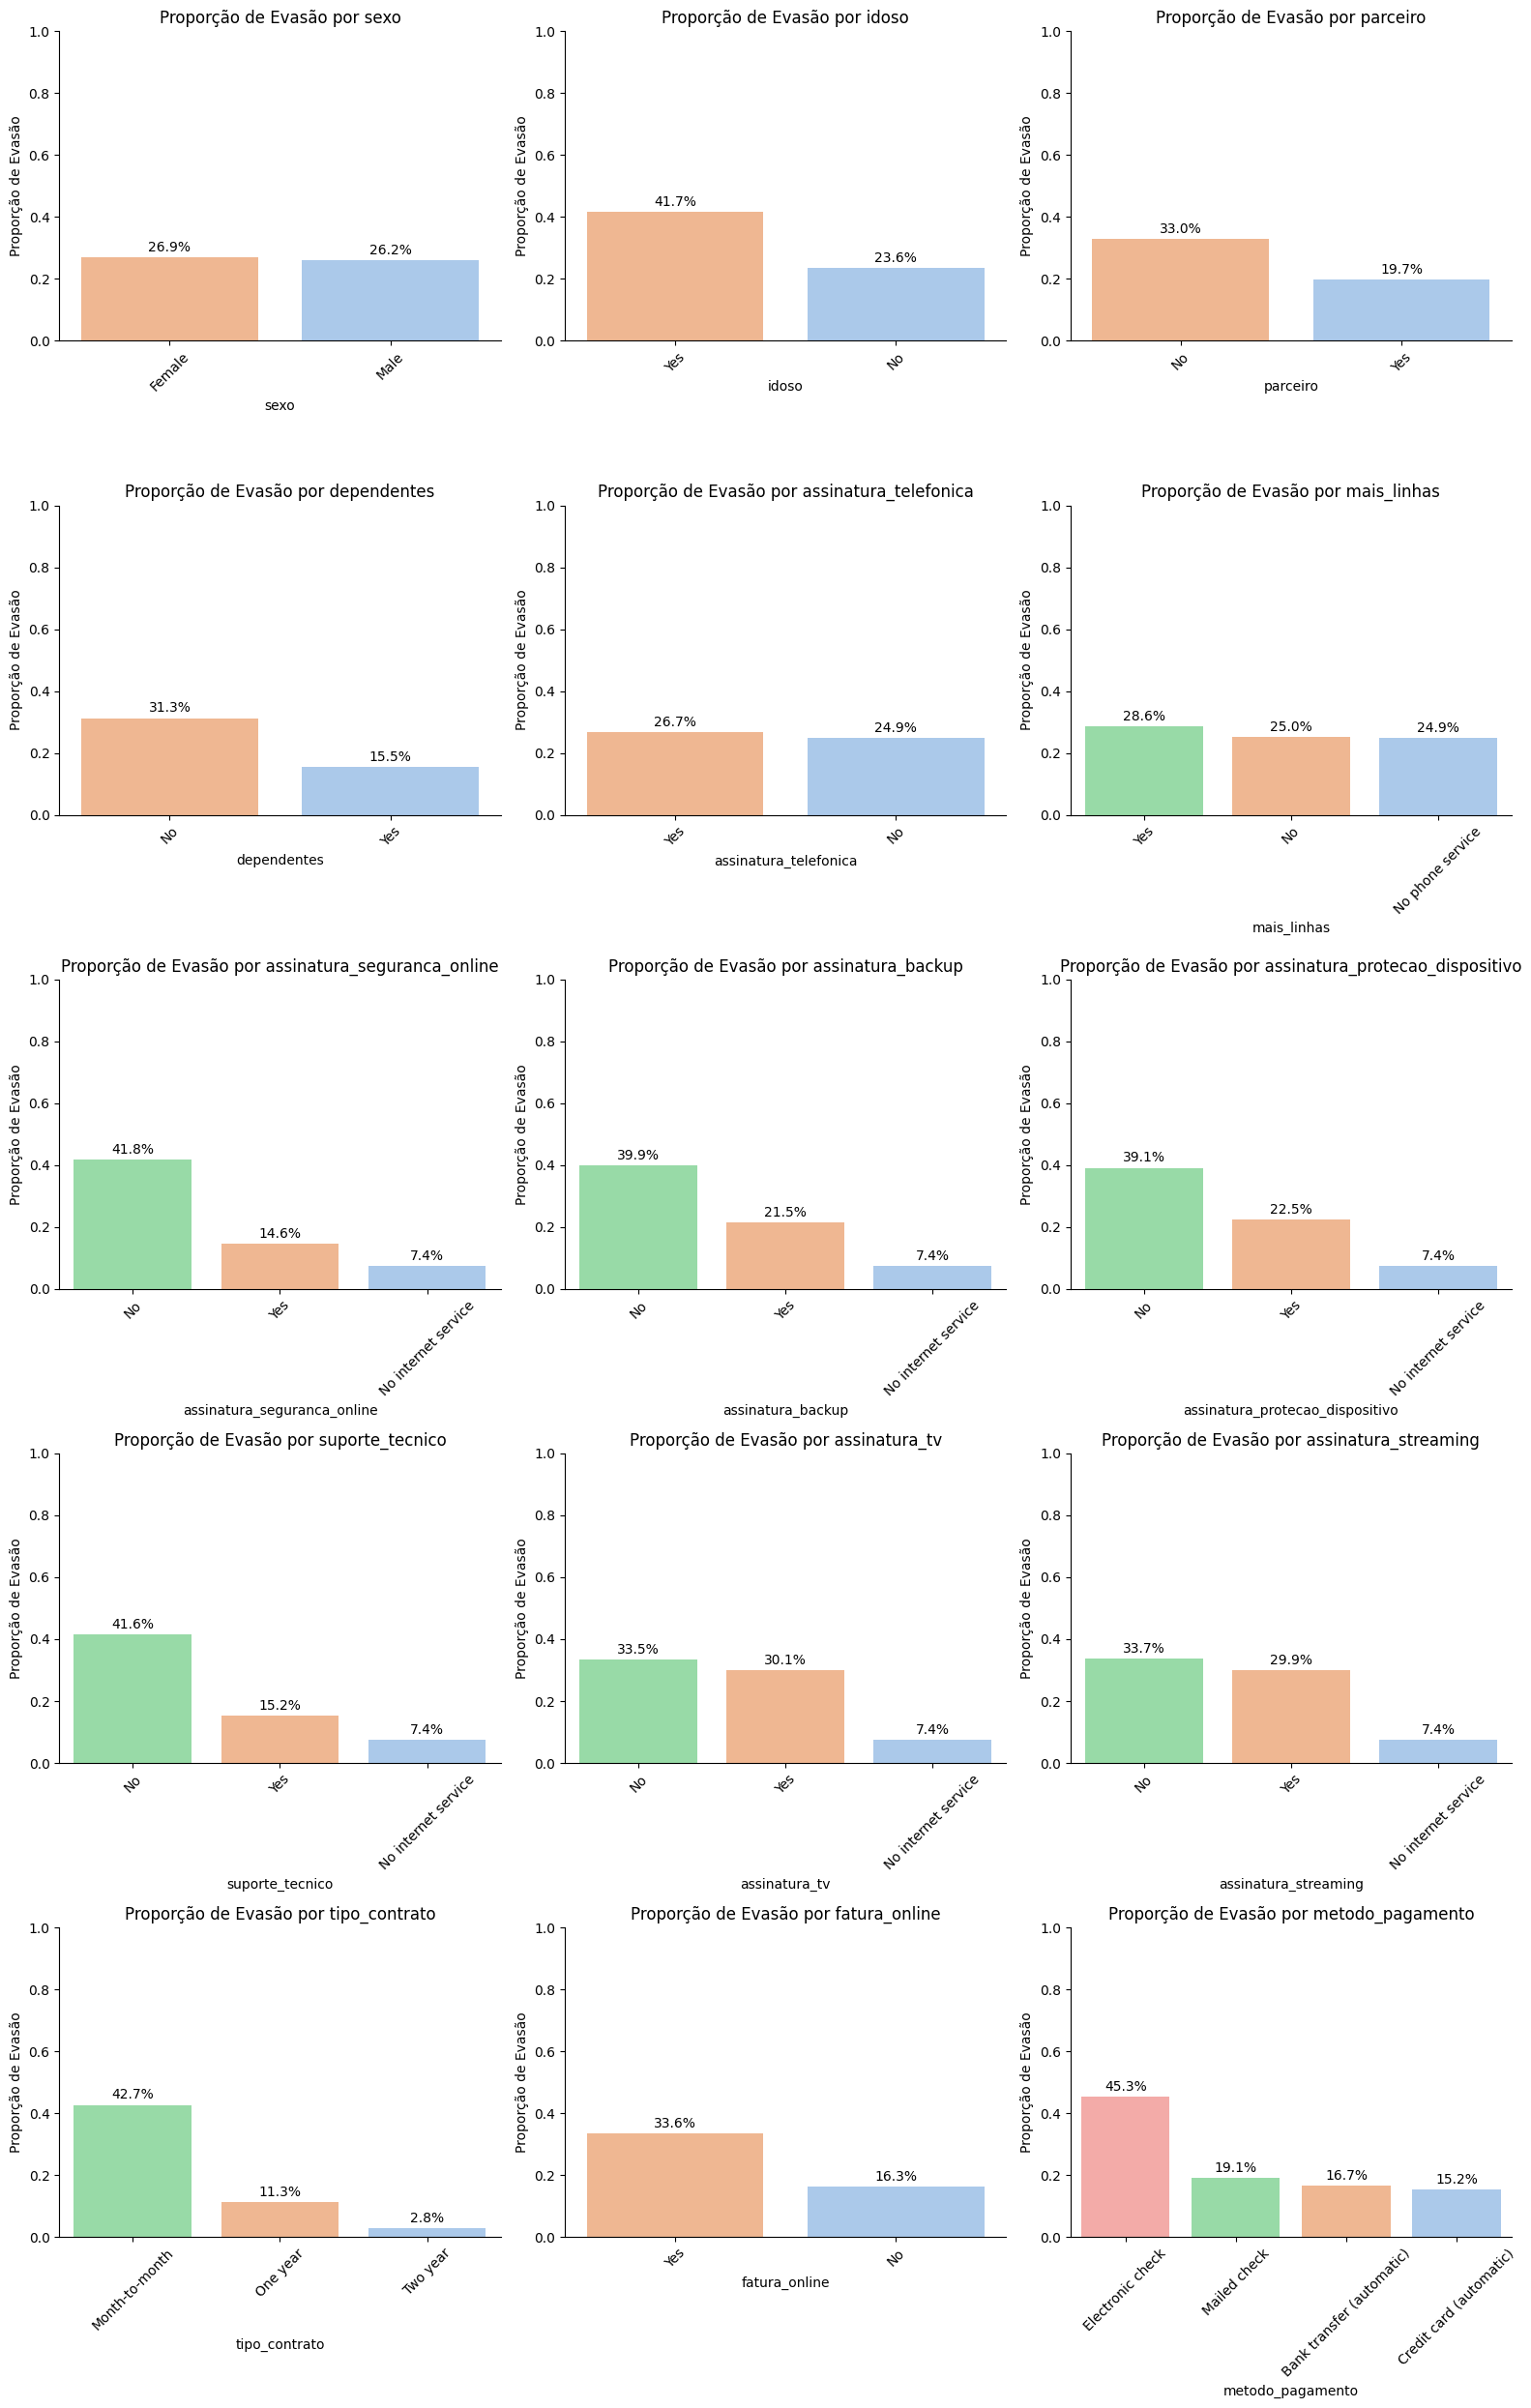

In [159]:
plt.figure(figsize=(16,25))

for i, col in enumerate(colunas_categoricas, 1):
    plt.subplot(5, 3, i)


    # Calcular proporção de churn por categoria
    prop = dados.groupby(col)['evasao'].mean().sort_values(ascending=False)

    # Gráfico de barras
    ax = sns.barplot(x=prop.index, y=prop.values, palette='pastel', hue=prop.values, legend=False)

    # Adicionar valores no topo das barras (%)
    for p in ax.patches:
        altura = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., altura + 0.01, f"{altura*100:.1f}%",
                ha='center', va='bottom', fontsize=10)

    plt.title(f"Proporção de Evasão por {col}")
    plt.xlabel(col)
    plt.ylabel("Proporção de Evasão")
    plt.ylim(0, 1)  # Limite de 0 a 1 para proporção
    plt.xticks(rotation=45)

    sns.despine()

plt.tight_layout()
plt.show()


### Contagem de Evasão por Variáveis Numéricas

In [160]:
colunas_numericas = ['meses_contrato', 'total_servico_mes', 'total_gasto', 'contas_diarias']

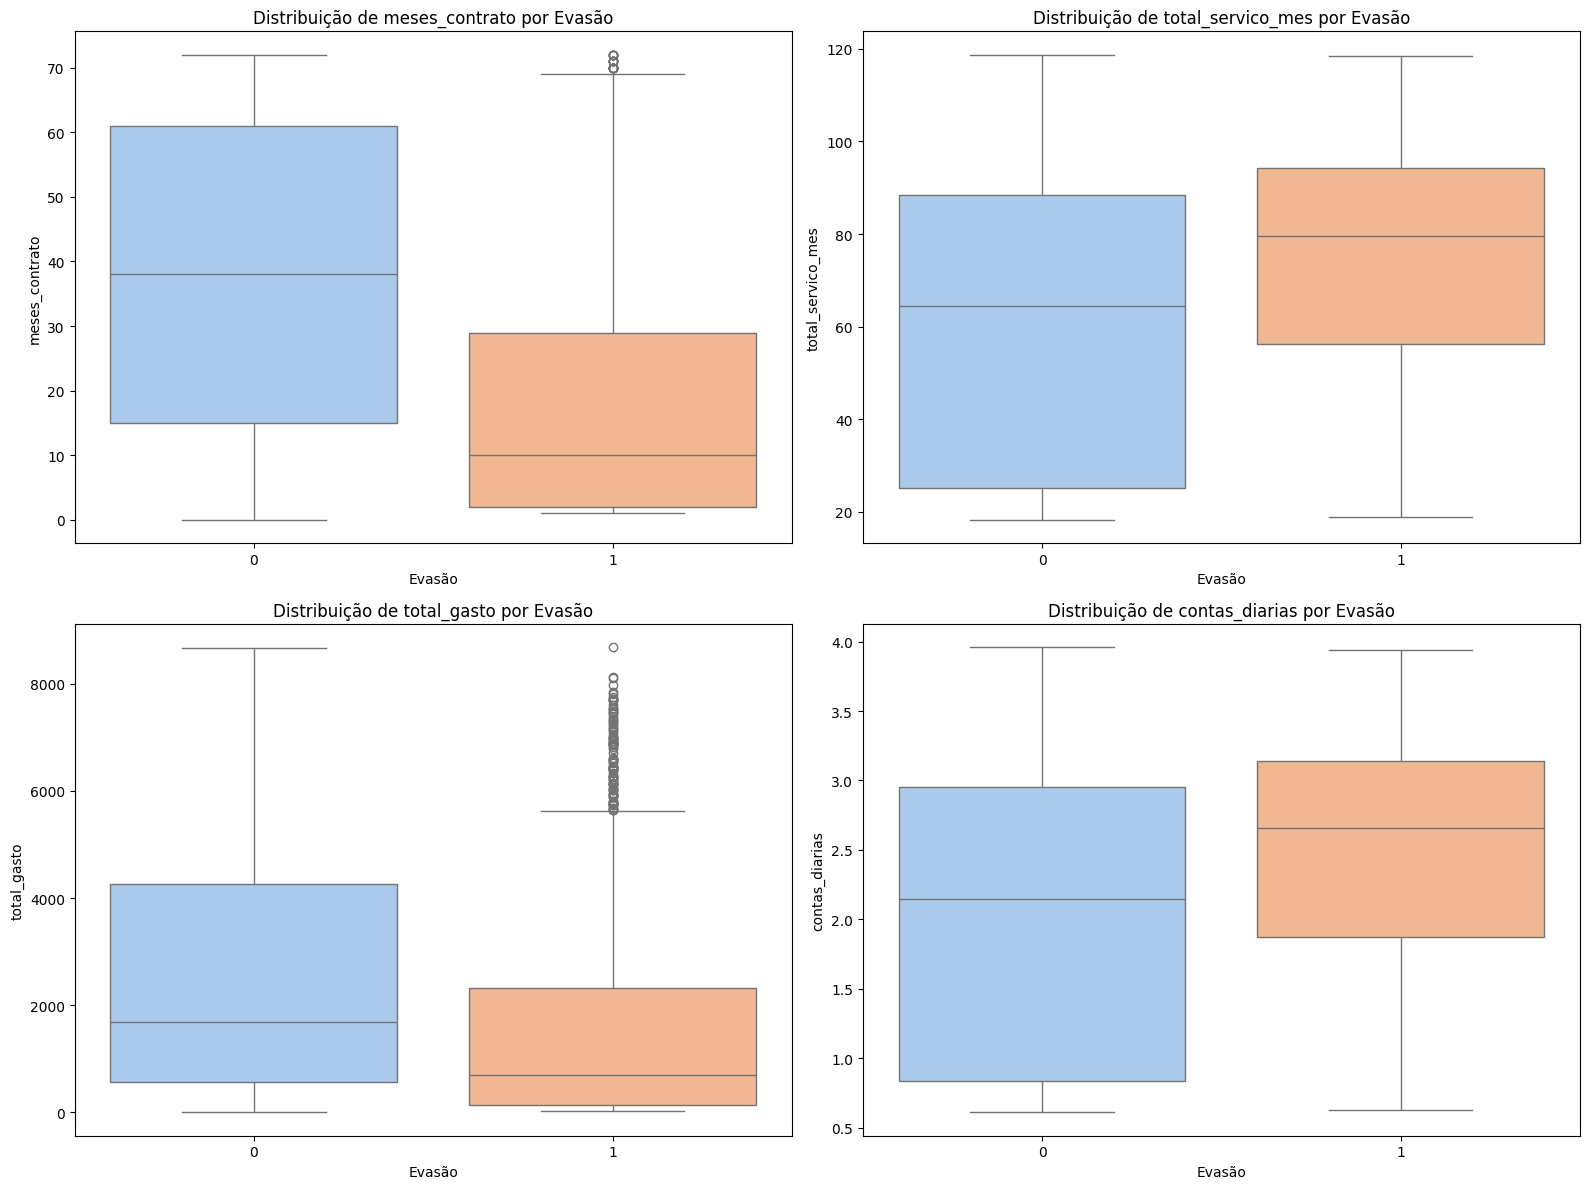

In [161]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(colunas_numericas, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=dados, x='evasao', y=col, palette='pastel', hue='evasao', legend=False)
    plt.title(f"Distribuição de {col} por Evasão")
    plt.xlabel("Evasão")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

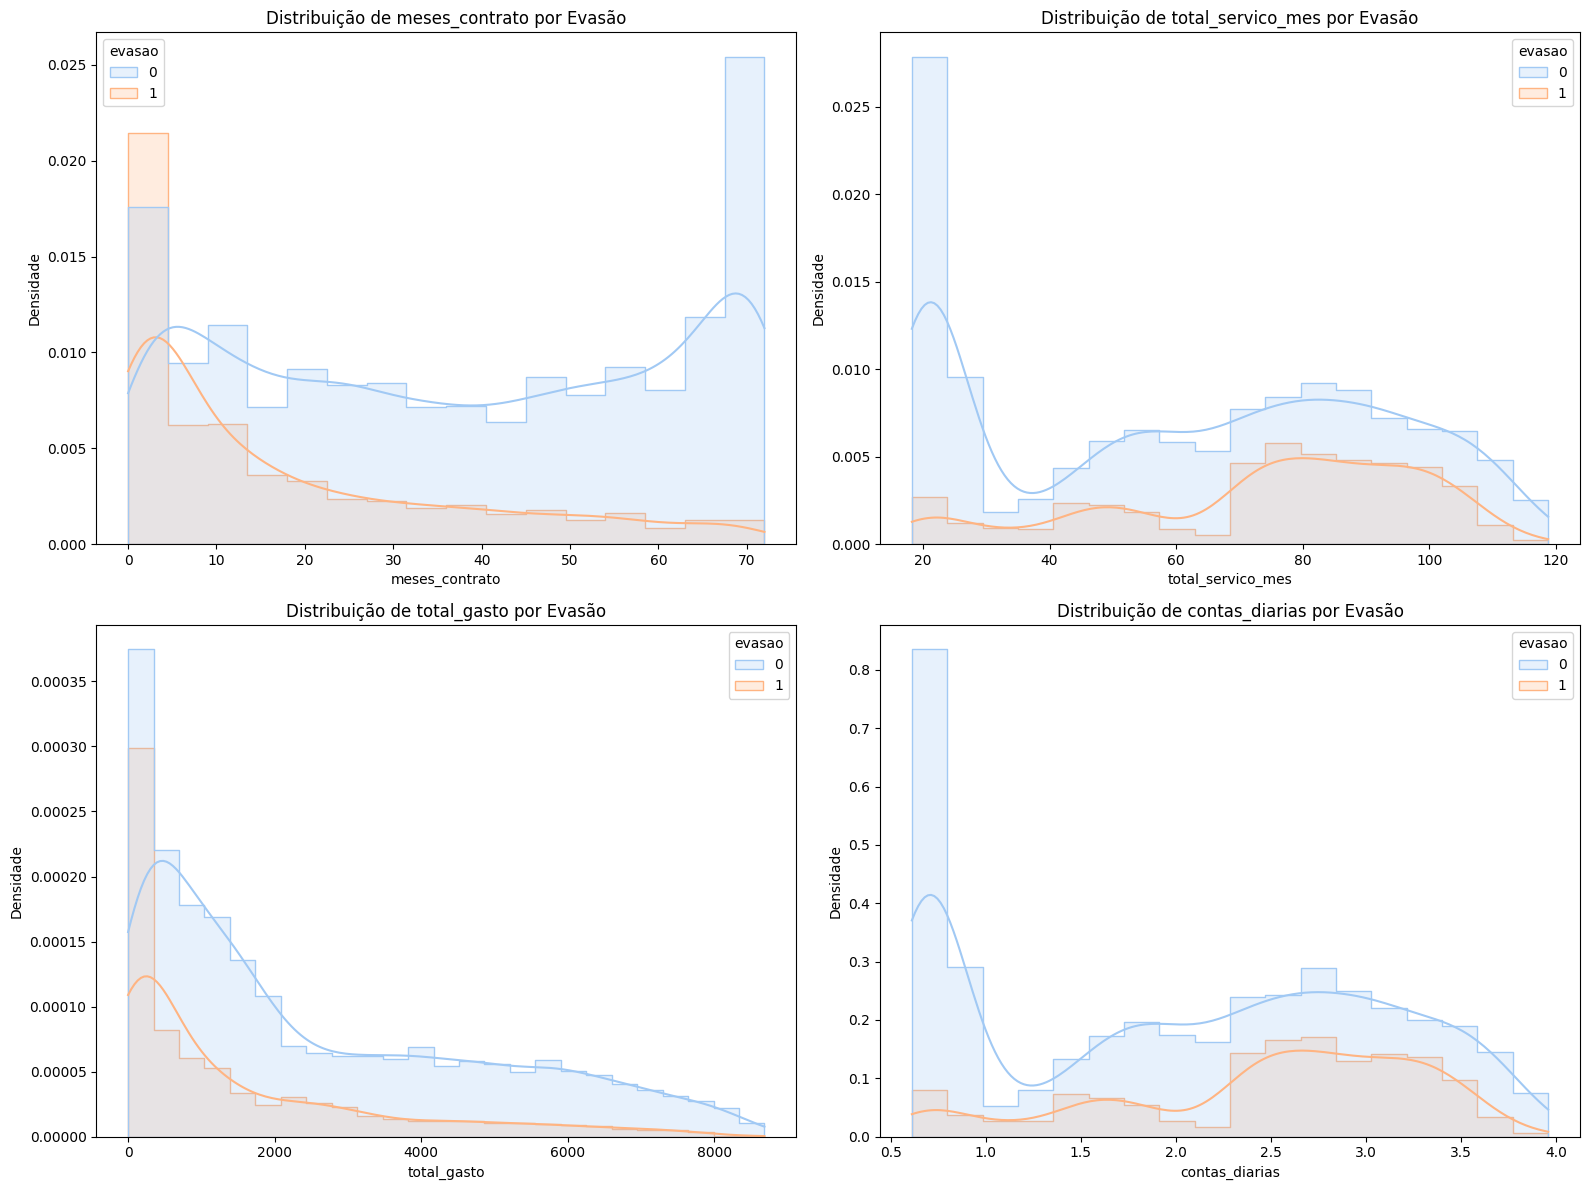

In [162]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(colunas_numericas, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=dados, x=col, hue='evasao', kde=True, element="step", stat="density", palette='pastel')
    plt.title(f"Distribuição de {col} por Evasão")
    plt.xlabel(col)
    plt.ylabel("Densidade")

plt.tight_layout()
plt.show()


# Transformar dados para ML

In [ ]:
colunas_binarias = ['evasao', 'parceiro', 'dependentes','assinatura_telefonica','fatura_online']

for coluna in colunas_binarias:
    dados[coluna] = dados[coluna].map({'Yes': 1, 'No': 0})